In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [15]:
df=pd.read_csv("cardio_train.csv", sep=';')

In [16]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [17]:
x=df.drop(['cardio'],axis=1)

In [18]:
y=df['cardio']

In [19]:
Feature=SelectKBest()
Feature.fit(x,y)

SelectKBest()

<AxesSubplot:>

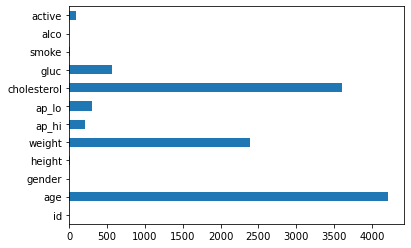

In [20]:
pd.Series(Feature.scores_,index=x.columns).plot(kind='barh')

In [21]:
topper=list(pd.Series(Feature.scores_,index=x.columns).nlargest(7).keys())

In [24]:
x=df[topper]

In [25]:
Scaler=StandardScaler()
Scaled_x=Scaler.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split,cross_val_score

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(Scaled_x,y,test_size=0.2,random_state=1)

In [31]:
Logi=LogisticRegression()
Forest=RandomForestClassifier(n_estimators=325)
Support=SVC(gamma='auto')

In [32]:
Algo_name=[Logi,Forest,Support]
name=['LR','Forest','SVC']

In [33]:
Average=[]
Scores=[]
for i in Algo_name:
    cv_score=cross_val_score(i,Scaled_x,y,cv=2)
    Scores.append(cv_score)
    Average.append(cv_score.mean())

## Convert From List To DataFrame

In [38]:
Scores=pd.DataFrame(Scores)
Average=pd.DataFrame(Average,columns=['Average'])
name=pd.DataFrame(name,columns=['Algorithms'])

## Table Creation

In [39]:
pd.concat([name,Scores],axis=1)

,Algorithms,0,1
0,LR,0.710343,0.724143
1,Forest,0.688914,0.691200
2,SVC,0.727400,0.728914


In [40]:
Table=pd.concat([name,Scores],axis=1)
pd.concat([Table,Average],axis=1)

,Algorithms,0,1,Average
0,LR,0.710343,0.724143,0.717243
1,Forest,0.688914,0.691200,0.690057
2,SVC,0.727400,0.728914,0.728157


## Best detection

In [42]:
Table=pd.concat([Table,Average],axis=1)
Average=list(Table['Average'])

In [43]:
Best=Algo_name[Average.index(max(Average))]

In [44]:
Best.fit(xtrain,ytrain)

SVC(gamma='auto')

In [45]:
Best.score(xtest,ytest)

0.7305714285714285

In [46]:
import pickle as pk

In [48]:
Model=pk.dump(Best,open('My_Model','wb'))

In [49]:
import os
os.getcwd()

'C:\\Users\\Masba\\OneDrive'

In [50]:
Best.predict([[ 0.30768633,  2.40079294,  0.74983117, -0.39571994, -0.03517999,
        0.07261016,  0.49416711]])

array([1], dtype=int64)